# Mục tiêu : Đọc và phân tích thành phần trong dataset

* Fb15k
* Fb15k-237
* WN18
* WN18RR

In [ ]:
!pip install seaborn

In [2]:
import os
import glob
import pandas as pd
import scipy
import scipy.io
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ROOT = os.path.abspath(os.path.join(".", os.pardir))
DS_DIR = os.path.join(ROOT, "datasets")
DATASETS = ["FB15k", "FB15k-237", "WN18", "WN18RR"]

for dataset in DATASETS:
    dataset_dir = os.path.join(DS_DIR, dataset);
    print(dataset_dir)
    for file in os.listdir(dataset_dir):
        if file.endswith(".txt"):
            print("[",dataset, "]: ", file)

D:\Workspace\thesis\datasets\FB15k
[ FB15k ]:  freebase_mtr100_mte100-test.txt
[ FB15k ]:  freebase_mtr100_mte100-train.txt
[ FB15k ]:  freebase_mtr100_mte100-valid.txt
D:\Workspace\thesis\datasets\FB15k-237
[ FB15k-237 ]:  test.txt
[ FB15k-237 ]:  train.txt
[ FB15k-237 ]:  valid.txt
D:\Workspace\thesis\datasets\WN18
[ WN18 ]:  wordnet-mlj12-definitions.txt
[ WN18 ]:  wordnet-mlj12-test.txt
[ WN18 ]:  wordnet-mlj12-train.txt
[ WN18 ]:  wordnet-mlj12-valid.txt
D:\Workspace\thesis\datasets\WN18RR
[ WN18RR ]:  test.txt
[ WN18RR ]:  train.txt
[ WN18RR ]:  valid.txt


In [3]:
def read_all_data(dataset):
    dataset_dir = os.path.join(DS_DIR, dataset)
    test_file = glob.glob(os.path.join(dataset_dir, "*test.txt"))[0];
    train_file = glob.glob(os.path.join(dataset_dir, "*train.txt"))[0];
    valid_file = glob.glob(os.path.join(dataset_dir, "*valid.txt"))[0];
    
    test = pd.read_csv(test_file, delim_whitespace=True,header=None)
    train = pd.read_csv(train_file, delim_whitespace=True,header=None)
    valid = pd.read_csv(valid_file, delim_whitespace=True,header=None)
    test.columns = ['heads', 'relations', "tails"]
    train.columns = ['heads', 'relations', "tails"]
    valid.columns = ['heads', 'relations', "tails"]
    
    return (test, train, valid)

In [4]:
FB15k_test, FB15k_train, FB15k_valid = read_all_data("FB15k")
FB15k_237_test, FB15k_237_train, FB15k_237_valid = read_all_data("FB15k-237")
WN18_test, WN18_train, WN18_valid = read_all_data("WN18")
WN18RR_test, WN18RR_train, WN18RR_valid = read_all_data("WN18RR")

### FB15k

In [5]:
FB15k_train

heads                                          relations  \
0         /m/027rn               /location/country/form_of_government   
1        /m/017dcd  /tv/tv_program/regular_cast./tv/regular_tv_app...   
2       /m/07s9rl0                 /media_common/netflix_genre/titles   
3        /m/01sl1q  /award/award_winner/awards_won./award/award_ho...   
4        /m/0cnk2q  /soccer/football_team/current_roster./sports/s...   
...            ...                                                ...   
483137    /m/0gpx6  /award/award_nominated_work/award_nominations....   
483138   /m/020jqv  /award/award_nominee/award_nominations./award/...   
483139  /m/0524b41  /award/award_winning_work/awards_won./award/aw...   
483140    /m/0kvsb  /people/person/education./education/education/...   
483141    /m/03p41              /medicine/disease/medical_specialties   

             tails  
0         /m/06cx9  
1        /m/06v8s0  
2        /m/0170z3  
3        /m/044mz_  
4        /m/02nzb8  
...            ...  
483137   /m/0gq6s3  
483138   /m/09d3b7  
483139  /m/0lp_cd3  
483140   /m/050xpd  
483141    /m/03tp4  

[483142 rows x 3 columns]

In [6]:
print(FB15k_test.info())
print(FB15k_train.info())
print(FB15k_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59071 entries, 0 to 59070
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      59071 non-null  object
 1   relations  59071 non-null  object
 2   tails      59071 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483142 entries, 0 to 483141
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   heads      483142 non-null  object
 1   relations  483142 non-null  object
 2   tails      483142 non-null  object
dtypes: object(3)
memory usage: 11.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      50000 non-null  object
 1   relations  50000 non-null  object
 2   tails      50000 non-null  

In [7]:
FB15k_test.describe(include='all')

heads                                          relations  \
count        59071                                              59071   
unique       12297                                                961   
top     /m/08mbj5d  /award/award_nominee/award_nominations./award/...   
freq           421                                               2060   

            tails  
count       59071  
unique      11825  
top     /m/09c7w0  
freq          951

In [8]:
FB15k_train.describe(include='all')

heads                                          relations  \
count       483142                                             483142   
unique       14834                                               1345   
top     /m/08mbj5d  /award/award_nominee/award_nominations./award/...   
freq          3604                                              15998   

            tails  
count      483142  
unique      14903  
top     /m/09c7w0  
freq         7863

In [9]:
FB15k_valid.describe(include='all')

heads                                          relations  \
count        50000                                              50000   
unique       11886                                                916   
top     /m/08mbj5d  /award/award_nominee/award_nominations./award/...   
freq           356                                               1706   

            tails  
count       50000  
unique      11285  
top     /m/09c7w0  
freq          831

In [10]:
def calc_ditributed(dataset):
    return dataset.groupby(['relations'])['relations'].count().to_frame().rename(
        columns={'relations':'counts'}).reset_index()

FB15k_test_group = calc_ditributed(FB15k_test)
FB15k_test_group

relations  counts
0    /american_football/football_coach_position/coa...       3
1    /american_football/football_player/former_team...       3
2    /american_football/football_player/former_team...       7
3    /american_football/football_player/former_team...       4
4    /american_football/football_player/games./amer...       1
..                                                 ...     ...
956  /visual_art/art_period_movement/associated_art...       2
957                    /visual_art/artwork/art_subject       2
958                /visual_art/visual_art_form/artists       3
959                /visual_art/visual_artist/art_forms       3
960  /visual_art/visual_artist/associated_periods_o...       3

[961 rows x 2 columns]

In [11]:
FB15k_train_group = calc_ditributed(FB15k_train)
FB15k_train_group

relations  counts
0     /american_football/football_coach/coaching_his...       1
1     /american_football/football_coach/coaching_his...       1
2     /american_football/football_coach_position/coa...       1
3     /american_football/football_coach_position/coa...      38
4     /american_football/football_player/current_tea...       1
...                                                 ...     ...
1340                /visual_art/visual_art_form/artists      32
1341               /visual_art/visual_art_form/artworks       1
1342              /visual_art/visual_art_genre/artworks       1
1343                /visual_art/visual_artist/art_forms      32
1344  /visual_art/visual_artist/associated_periods_o...      14

[1345 rows x 2 columns]

In [12]:
FB15k_valid_group = calc_ditributed(FB15k_valid)
FB15k_valid_group

relations  counts
0    /american_football/football_player/former_team...       1
1    /american_football/football_player/former_team...       7
2    /american_football/football_player/former_team...       2
3    /american_football/football_player/former_team...       5
4    /american_football/football_player/games./amer...       1
..                                                 ...     ...
911  /venture_capital/venture_investor/investments....       1
912  /visual_art/art_period_movement/associated_art...       1
913                /visual_art/visual_art_form/artists       5
914                /visual_art/visual_artist/art_forms       5
915  /visual_art/visual_artist/associated_periods_o...       1

[916 rows x 2 columns]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

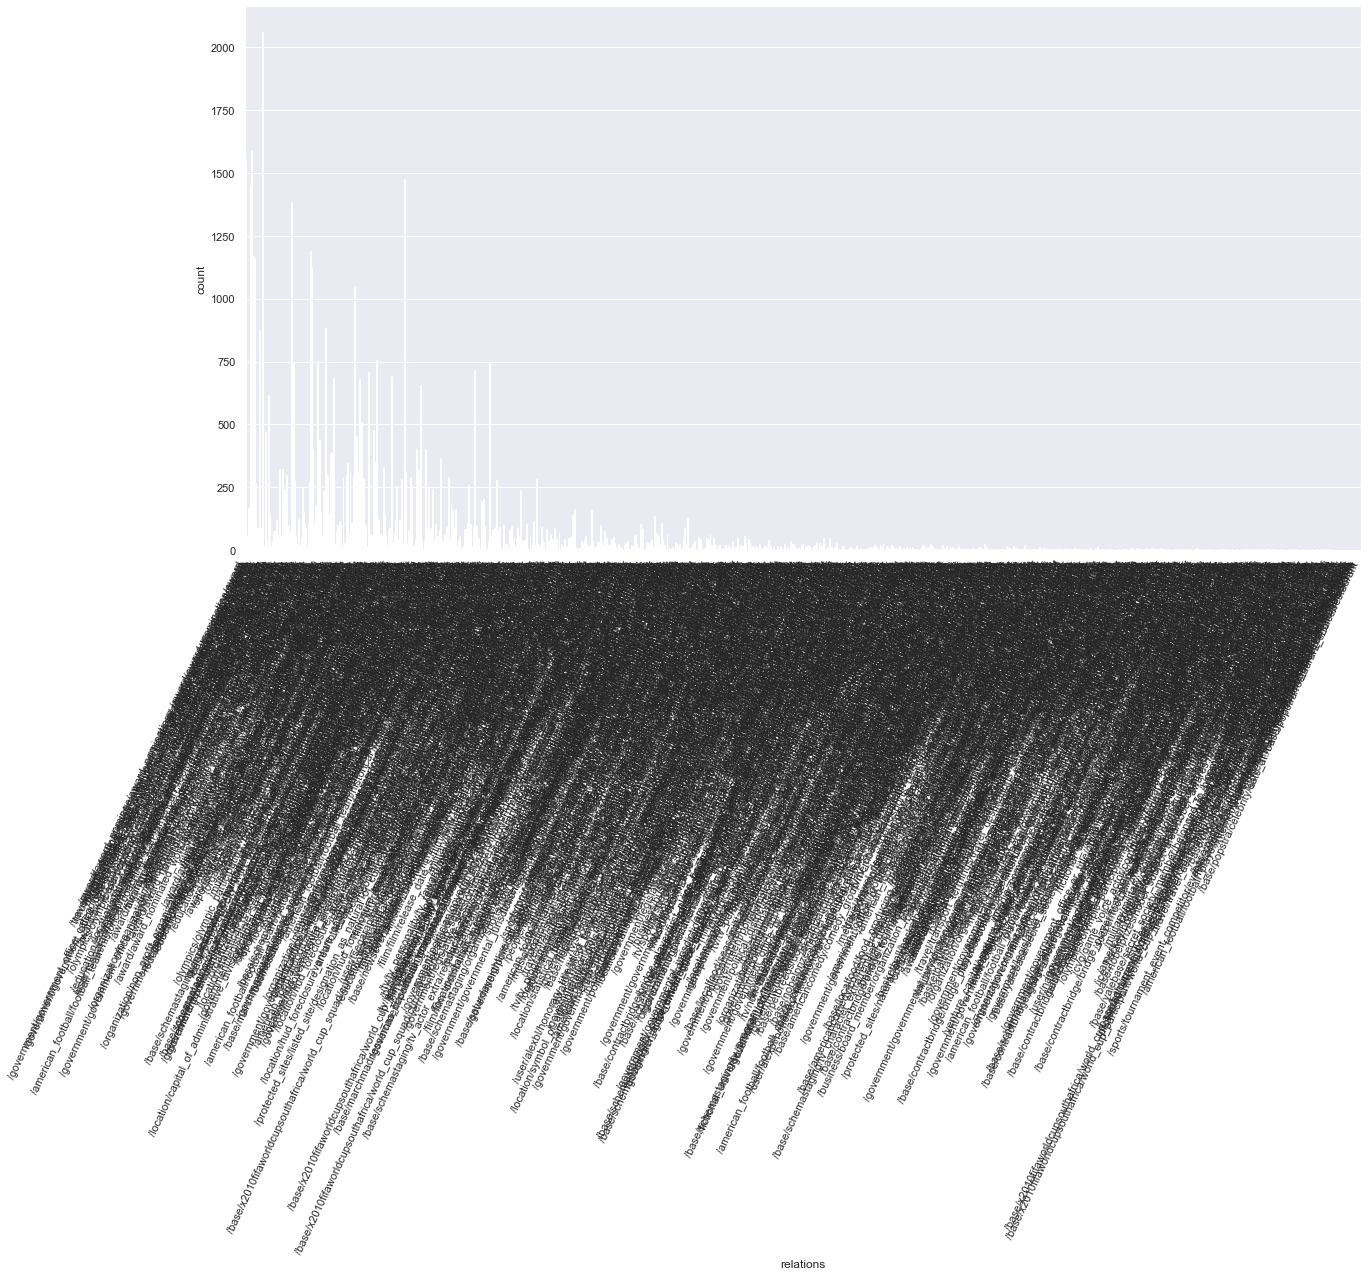

In [49]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=FB15k_test)
plt.xticks(rotation=65, horizontalalignment='right')

(array([   0,    1,    2, ..., 1342, 1343, 1344]),
 <a list of 1345 Text xticklabel objects>)

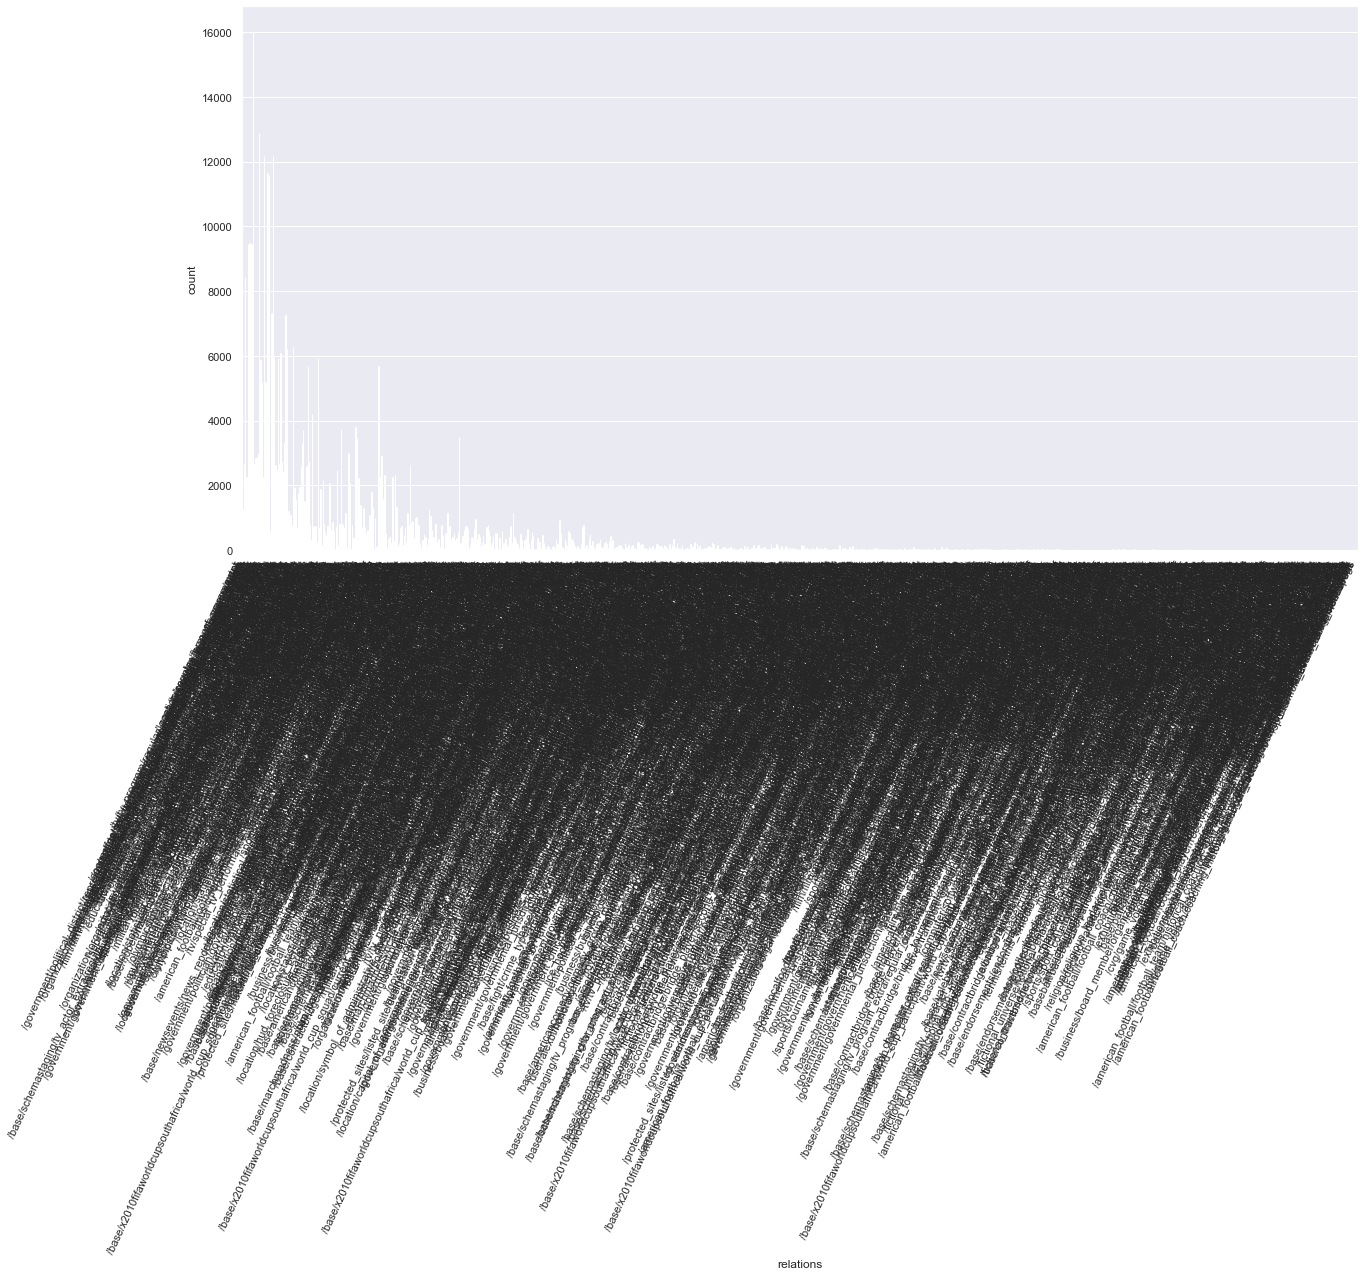

In [48]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=FB15k_train)
plt.xticks(rotation=65, horizontalalignment='right')

## Nhận xét :

Tập dữ liệu FB15k có rất nhiều loại quan hệ (relation_type) : 961 (test), 1345(train), 916(valid)


### FB15k-237

In [15]:
FB15k_237_train

heads                                          relations  \
0         /m/027rn               /location/country/form_of_government   
1        /m/017dcd  /tv/tv_program/regular_cast./tv/regular_tv_app...   
2       /m/07s9rl0                 /media_common/netflix_genre/titles   
3        /m/01sl1q  /award/award_winner/awards_won./award/award_ho...   
4        /m/0cnk2q  /soccer/football_team/current_roster./sports/s...   
...            ...                                                ...   
272110   /m/016mhd  /film/film/release_date_s./film/film_regional_...   
272111   /m/01g888                               /music/genre/artists   
272112   /m/0djvzd  /soccer/football_player/current_team./sports/s...   
272113  /m/0gmblvq  /award/award_winning_work/awards_won./award/aw...   
272114   /m/020jqv  /award/award_nominee/award_nominations./award/...   

             tails  
0         /m/06cx9  
1        /m/06v8s0  
2        /m/0170z3  
3        /m/044mz_  
4        /m/02nzb8  
...            ...  
272110    /m/029j_  
272111  /m/01vv126  
272112   /m/02b16p  
272113  /m/07kjk7c  
272114   /m/09d3b7  

[272115 rows x 3 columns]

In [16]:
print(FB15k_237_test.info())
print(FB15k_237_train.info())
print(FB15k_237_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20466 entries, 0 to 20465
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      20466 non-null  object
 1   relations  20466 non-null  object
 2   tails      20466 non-null  object
dtypes: object(3)
memory usage: 479.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272115 entries, 0 to 272114
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   heads      272115 non-null  object
 1   relations  272115 non-null  object
 2   tails      272115 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17535 entries, 0 to 17534
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      17535 non-null  object
 1   relations  17535 non-null  object
 2   tails      17535 non-null 

In [17]:
FB15k_237_test.describe(include='all')

heads                                          relations  \
count       20466                                              20466   
unique       8171                                                224   
top     /m/09c7w0  /film/film/release_date_s./film/film_regional_...   
freq          110                                               1447   

            tails  
count       20466  
unique       6376  
top     /m/09c7w0  
freq          454

In [18]:
FB15k_237_train.describe(include='all')

heads                                          relations  \
count      272115                                             272115   
unique      13781                                                237   
top     /m/09c7w0  /award/award_nominee/award_nominations./award/...   
freq         1325                                              15989   

            tails  
count      272115  
unique      13379  
top     /m/09c7w0  
freq         6289

In [19]:
FB15k_237_valid.describe(include='all')

heads                                          relations  \
count       17535                                              17535   
unique       7652                                                223   
top     /m/09c7w0  /film/film/release_date_s./film/film_regional_...   
freq           83                                               1228   

            tails  
count       17535  
unique       5804  
top     /m/09c7w0  
freq          381

In [36]:
def calc_ditributed(dataset):
    return dataset.groupby(['relations'])['relations'].count().to_frame().rename(
        columns={'relations':'counts'}).reset_index()

FB15k237_test_group = calc_ditributed(FB15k_237_test)
FB15k237_test_group["index"] = range(1, FB15k237_test_group.shape[0] + 1)
FB15k237_test_group

relations  counts  index
0                    /award/award_category/category_of      20      1
1        /award/award_category/disciplines_or_subjects      15      2
2    /award/award_category/nominees./award/award_no...     858      3
3    /award/award_category/winners./award/award_hon...     217      4
4    /award/award_category/winners./award/award_hon...     323      5
..                                                 ...     ...    ...
219  /tv/tv_writer/tv_programs./tv/tv_program_write...       9    220
220   /user/alexander/philosophy/philosopher/interests       9    221
221       /user/jg/default_domain/olympic_games/sports      11    222
222  /user/ktrueman/default_domain/international_or...      24    223
223  /user/tsegaran/random/taxonomy_subject/entry./...      50    224

[224 rows x 3 columns]

In [37]:
FB15k237_train_group = calc_ditributed(FB15k_237_train)
FB15k237_train_group["index"] = range(1, FB15k237_train_group.shape[0] + 1)
FB15k237_train_group

relations  counts  index
0    /american_football/football_team/current_roste...     573      1
1                    /award/award_category/category_of     148      2
2        /award/award_category/disciplines_or_subjects     204      3
3    /award/award_category/nominees./award/award_no...    9465      4
4    /award/award_category/winners./award/award_hon...    5673      5
..                                                 ...     ...    ...
232  /tv/tv_writer/tv_programs./tv/tv_program_write...     271    233
233   /user/alexander/philosophy/philosopher/interests     100    234
234       /user/jg/default_domain/olympic_games/sports     581    235
235  /user/ktrueman/default_domain/international_or...     179    236
236  /user/tsegaran/random/taxonomy_subject/entry./...     411    237

[237 rows x 3 columns]

In [38]:
FB15k237_valid_group = calc_ditributed(FB15k_237_valid)
FB15k237_valid_group["index"] = range(1, FB15k237_valid_group.shape[0] + 1)
FB15k237_valid_group

relations  counts  index
0    /american_football/football_team/current_roste...       1      1
1                    /award/award_category/category_of      13      2
2        /award/award_category/disciplines_or_subjects      21      3
3    /award/award_category/nominees./award/award_no...     746      4
4    /award/award_category/winners./award/award_hon...     180      5
..                                                 ...     ...    ...
218  /tv/tv_writer/tv_programs./tv/tv_program_write...       6    219
219   /user/alexander/philosophy/philosopher/interests      14    220
220       /user/jg/default_domain/olympic_games/sports       7    221
221  /user/ktrueman/default_domain/international_or...      15    222
222  /user/tsegaran/random/taxonomy_subject/entry./...      32    223

[223 rows x 3 columns]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

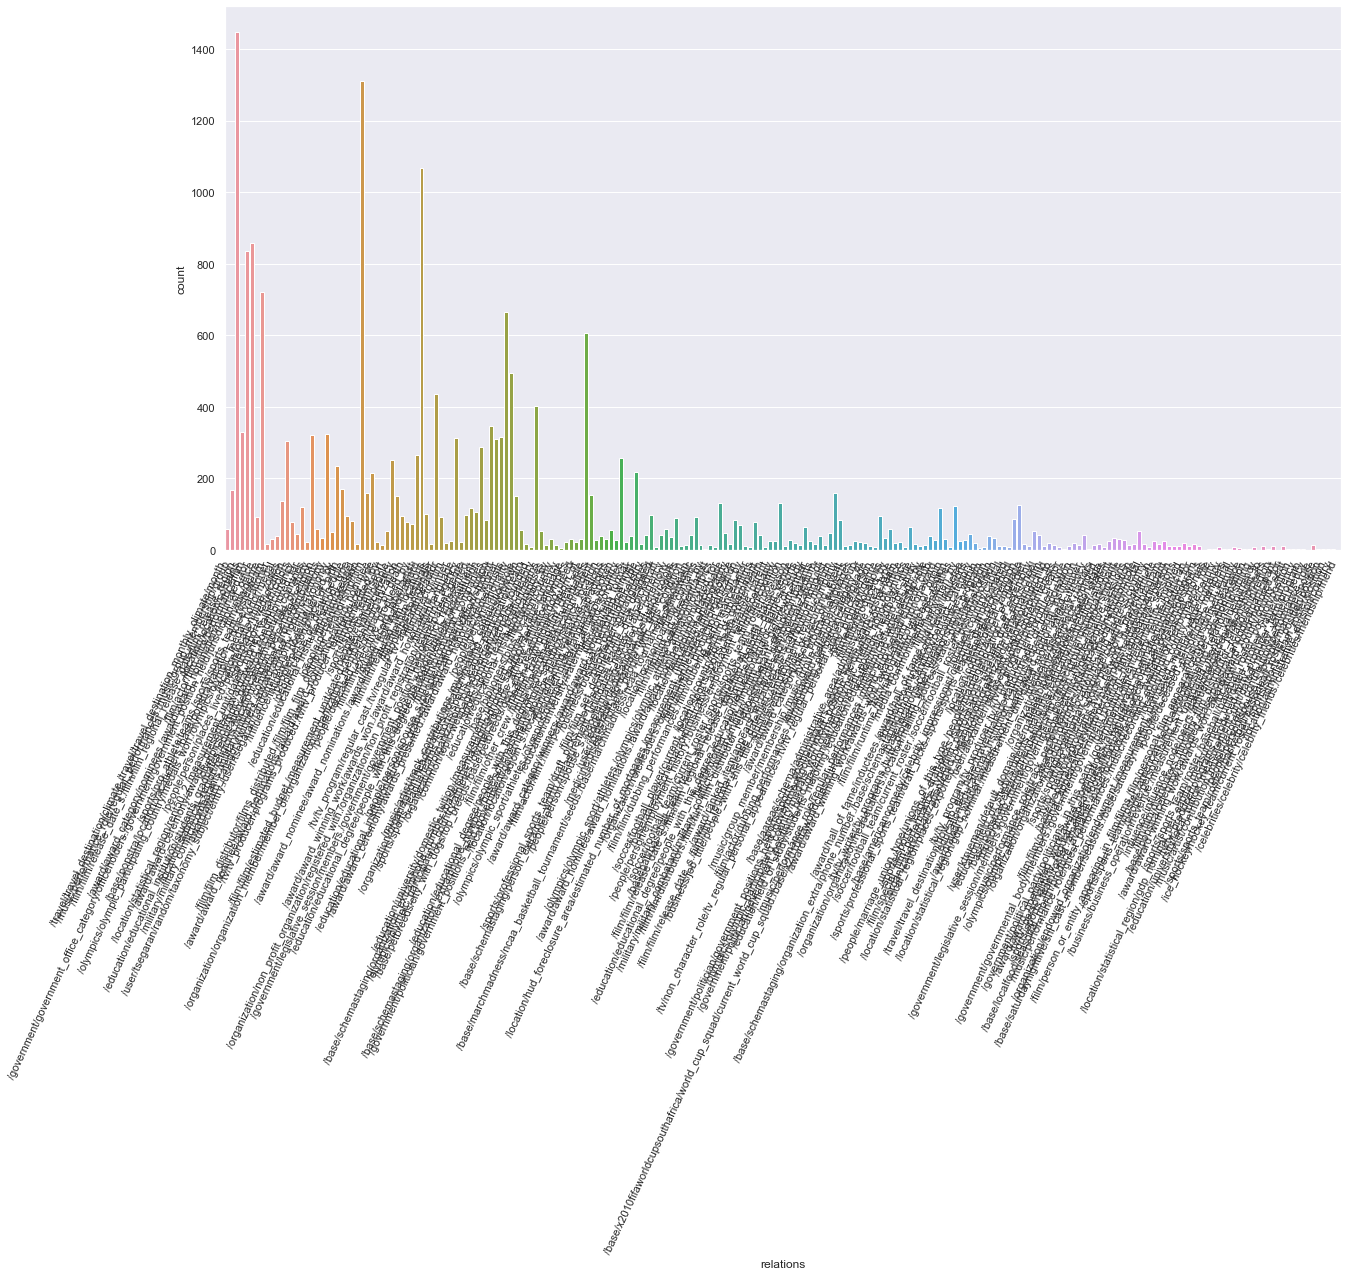

In [47]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', data=FB15k_237_test)
plt.xticks(rotation=65, horizontalalignment='right')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

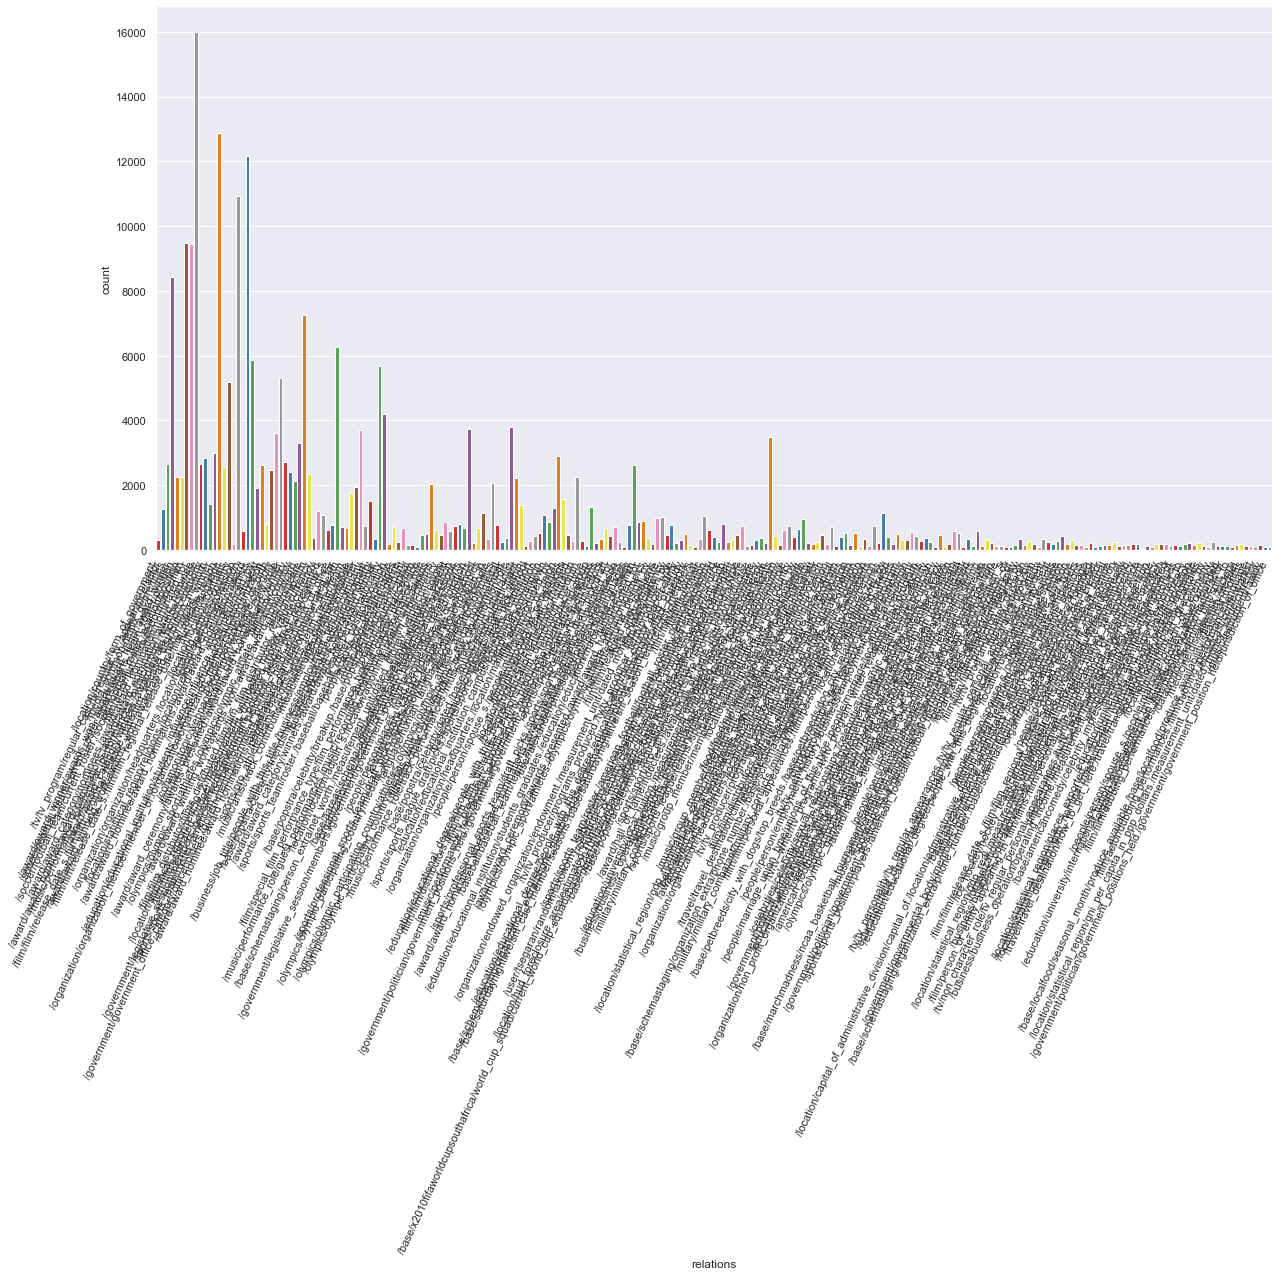

In [51]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=FB15k_237_train)
plt.xticks(rotation=65, horizontalalignment='right')

### Nhận xét :

Tập dữ liệu FB15k 237 có ít loại mối quan hệ hơn mặc dù số lượng thực thể vẫn dữ nguyên

## WN18

In [52]:
WN18_train

heads                     relations     tails
0        3964744                      _hyponym   4371774
1         260881                     _hypernym    260622
2        2199712               _member_holonym   2188065
3        1332730  _derivationally_related_form   3122748
4        6066555  _derivationally_related_form    645415
...          ...                           ...       ...
141437  13950812                      _hyponym  10026763
141438  12028818               _member_holonym  12028196
141439    962129             _instance_hyponym   1281154
141440   5532225                     _has_part   5533948
141441    980394       _synset_domain_topic_of    759694

[141442 rows x 3 columns]

In [53]:
print(WN18_test.info())
print(WN18_train.info())
print(WN18_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      5000 non-null   int64 
 1   relations  5000 non-null   object
 2   tails      5000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 117.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141442 entries, 0 to 141441
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   heads      141442 non-null  int64 
 1   relations  141442 non-null  object
 2   tails      141442 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      5000 non-null   int64 
 1   relations  5000 non-null   object
 2   tails     

In [54]:
WN18_test.describe(include='all')

heads  relations         tails
count   5.000000e+03       5000  5.000000e+03
unique           NaN         18           NaN
top              NaN  _hypernym           NaN
freq             NaN       1251           NaN
mean    5.763068e+06        NaN  5.747827e+06
std     4.516939e+06        NaN  4.537197e+06
min     3.826000e+03        NaN  1.740000e+03
25%     1.675770e+06        NaN  1.650444e+06
50%     4.771004e+06        NaN  4.735929e+06
75%     9.615807e+06        NaN  9.503816e+06
max     1.529801e+07        NaN  1.529767e+07

In [55]:
WN18_train.describe(include='all')

heads relations         tails
count   1.414420e+05    141442  1.414420e+05
unique           NaN        18           NaN
top              NaN  _hyponym           NaN
freq             NaN     34832           NaN
mean    5.816714e+06       NaN  5.818731e+06
std     4.566126e+06       NaN  4.565107e+06
min     1.740000e+03       NaN  1.740000e+03
25%     1.673503e+06       NaN  1.674750e+06
50%     4.910135e+06       NaN  4.916033e+06
75%     9.639919e+06       NaN  9.641757e+06
max     1.530005e+07       NaN  1.530005e+07

In [56]:
WN18_valid.describe(include='all')

heads relations         tails
count   5.000000e+03      5000  5.000000e+03
unique           NaN        18           NaN
top              NaN  _hyponym           NaN
freq             NaN      1236           NaN
mean    5.812262e+06       NaN  5.788305e+06
std     4.567558e+06       NaN  4.570915e+06
min     1.740000e+03       NaN  1.740000e+03
25%     1.680020e+06       NaN  1.692120e+06
50%     4.967252e+06       NaN  4.883140e+06
75%     9.686536e+06       NaN  9.678165e+06
max     1.530005e+07       NaN  1.529034e+07

In [59]:
def calc_ditributed(dataset):
    return dataset.groupby(['relations'])['relations'].count().to_frame().rename(
        columns={'relations':'counts'}).reset_index()

WN18_test_group = calc_ditributed(WN18_test)
WN18_test_group

relations  counts
0                      _also_see      56
1   _derivationally_related_form    1074
2                      _has_part     172
3                      _hypernym    1251
4                       _hyponym    1153
5             _instance_hypernym     122
6              _instance_hyponym     108
7                _member_holonym     278
8                _member_meronym     253
9       _member_of_domain_region      26
10       _member_of_domain_topic     111
11       _member_of_domain_usage      24
12                      _part_of     165
13                   _similar_to       3
14      _synset_domain_region_of      37
15       _synset_domain_topic_of     114
16       _synset_domain_usage_of      14
17                   _verb_group      39

In [60]:
WN18_train_group = calc_ditributed(WN18_train)
WN18_train_group

relations  counts
0                      _also_see    1299
1   _derivationally_related_form   29715
2                      _has_part    4816
3                      _hypernym   34796
4                       _hyponym   34832
5             _instance_hypernym    2921
6              _instance_hyponym    2935
7                _member_holonym    7382
8                _member_meronym    7402
9       _member_of_domain_region     923
10       _member_of_domain_topic    3118
11       _member_of_domain_usage     629
12                      _part_of    4805
13                   _similar_to      80
14      _synset_domain_region_of     903
15       _synset_domain_topic_of    3116
16       _synset_domain_usage_of     632
17                   _verb_group    1138

In [61]:
WN18_valid_group = calc_ditributed(WN18_valid)
WN18_valid_group

relations  counts
0                      _also_see      41
1   _derivationally_related_form    1078
2                      _has_part     154
3                      _hypernym    1174
4                       _hyponym    1236
5             _instance_hypernym     107
6              _instance_hyponym     107
7                _member_holonym     268
8                _member_meronym     273
9       _member_of_domain_region      34
10       _member_of_domain_topic     112
11       _member_of_domain_usage      22
12                      _part_of     178
13                   _similar_to       3
14      _synset_domain_region_of      42
15       _synset_domain_topic_of     105
16       _synset_domain_usage_of      23
17                   _verb_group      43

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

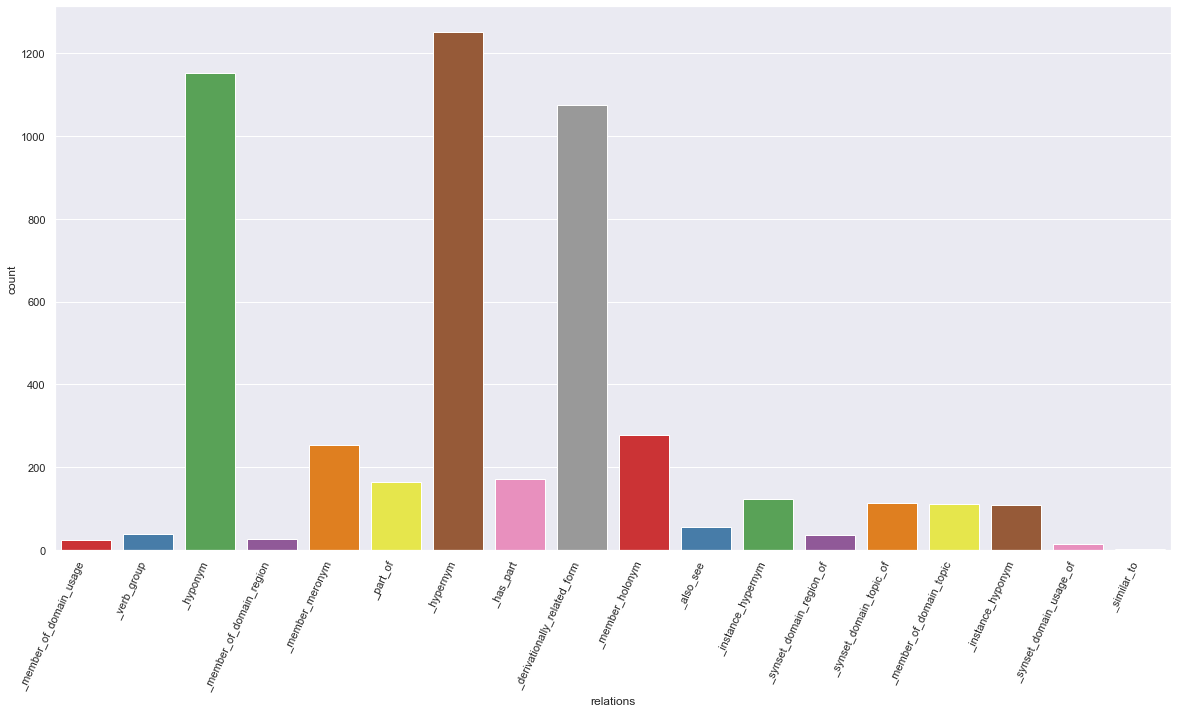

In [62]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18_test)
plt.xticks(rotation=65, horizontalalignment='right')

Có thể thấy mối quan hệ ở đây chủ yếu là hyponym & hypernym (Thượng vị và hạ vị) và derivationally_related_form (hình thức liên quan)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

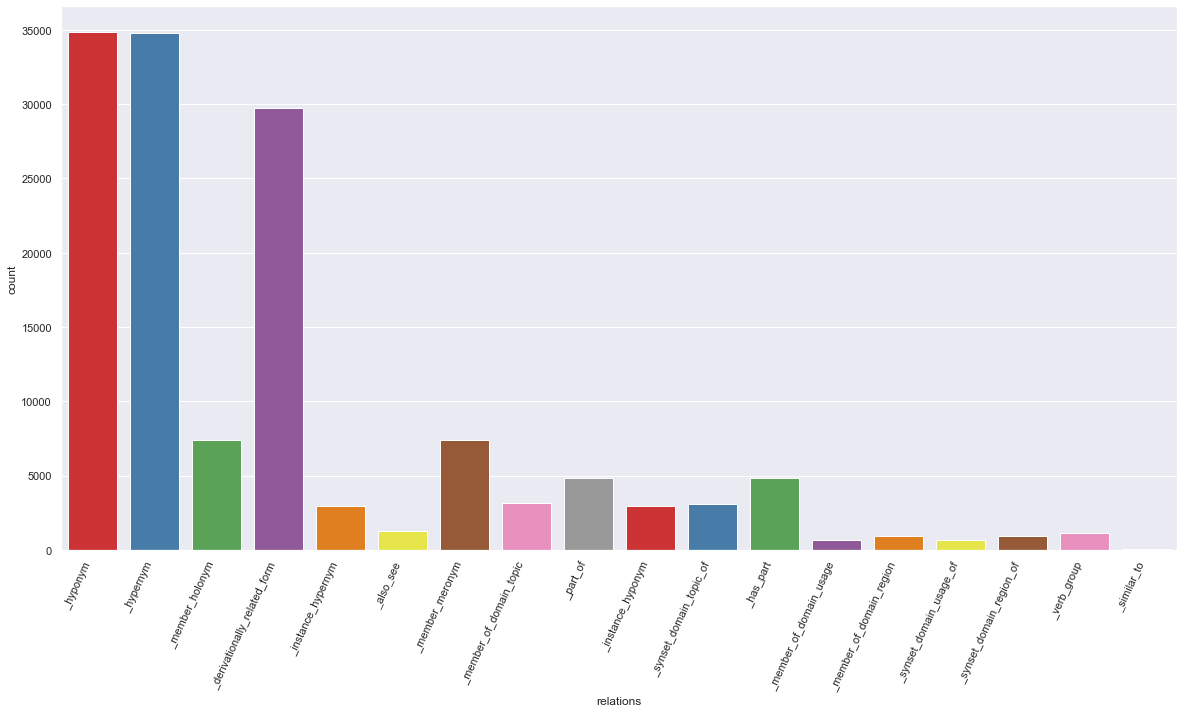

In [63]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18_train)
plt.xticks(rotation=65, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

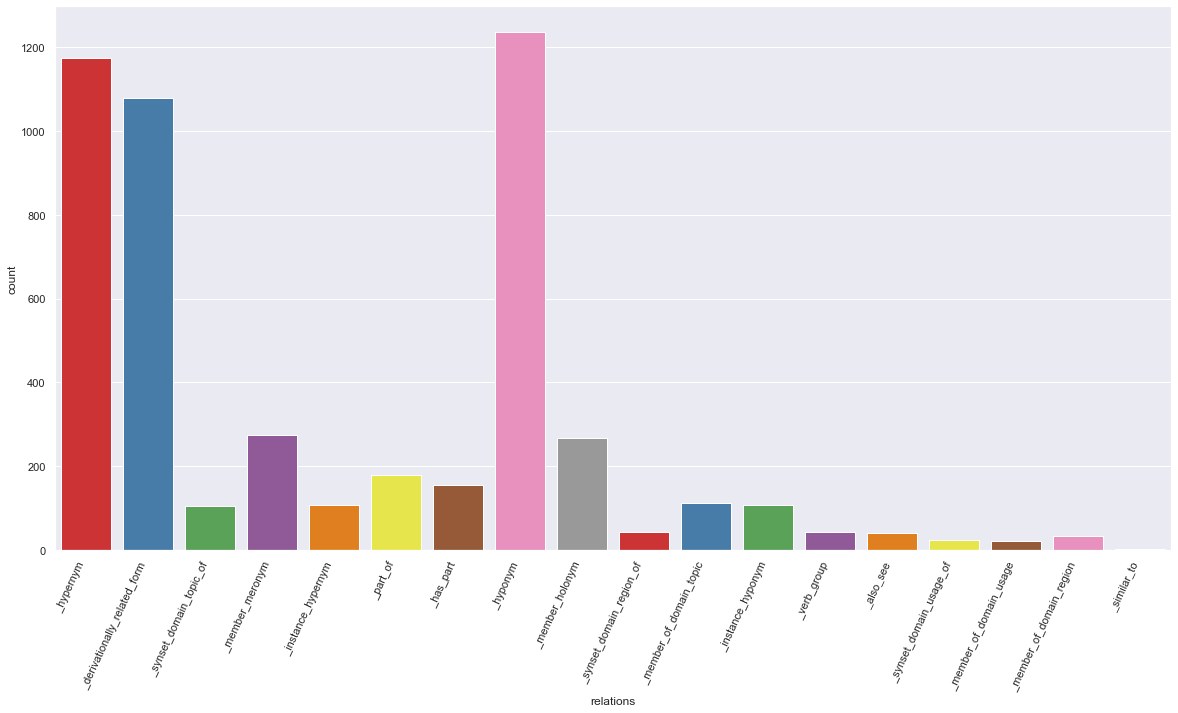

In [64]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18_valid)
plt.xticks(rotation=65, horizontalalignment='right')

## Nhận xét :

Tập dữ liệu WN18 có ít loại quan hệ hơn nhưng và số lượng sử dụng loại quan hệ đó thì rất nhiều

Các tập train, test, valid có phân bố tương đối giống nhau

## WN18RR

In [65]:
WN18RR_train

heads                     relations    tails
0       260881                     _hypernym   260622
1      1332730  _derivationally_related_form  3122748
2      6066555  _derivationally_related_form   645415
3      9322930            _instance_hypernym  9360122
4      7193596  _derivationally_related_form   784342
...        ...                           ...      ...
86830  2347865               _member_meronym  2348036
86831   856847                     _hypernym   844254
86832   800121                     _hypernym   799537
86833  5532225                     _has_part  5533948
86834   980394       _synset_domain_topic_of   759694

[86835 rows x 3 columns]

In [66]:
print(WN18RR_test.info())
print(WN18RR_train.info())
print(WN18RR_valid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      3134 non-null   int64 
 1   relations  3134 non-null   object
 2   tails      3134 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86835 entries, 0 to 86834
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      86835 non-null  int64 
 1   relations  86835 non-null  object
 2   tails      86835 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3034 entries, 0 to 3033
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   heads      3034 non-null   int64 
 1   relations  3034 non-null   object
 2   tails      3034 no

In [67]:
WN18RR_test.describe(include='all')

heads  relations         tails
count   3.134000e+03       3134  3.134000e+03
unique           NaN         11           NaN
top              NaN  _hypernym           NaN
freq             NaN       1251           NaN
mean    5.364592e+06        NaN  5.243399e+06
std     4.482237e+06        NaN  4.475209e+06
min     3.826000e+03        NaN  1.740000e+03
25%     1.485696e+06        NaN  1.368948e+06
50%     3.638262e+06        NaN  3.669134e+06
75%     9.068315e+06        NaN  8.767523e+06
max     1.529801e+07        NaN  1.529359e+07

In [68]:
WN18RR_train.describe(include='all')

heads  relations         tails
count   8.683500e+04      86835  8.683500e+04
unique           NaN         11           NaN
top              NaN  _hypernym           NaN
freq             NaN      34796           NaN
mean    5.533257e+06        NaN  5.379914e+06
std     4.556002e+06        NaN  4.514423e+06
min     1.740000e+03        NaN  1.740000e+03
25%     1.543570e+06        NaN  1.439121e+06
50%     4.004210e+06        NaN  3.808564e+06
75%     9.241588e+06        NaN  9.167578e+06
max     1.530005e+07        NaN  1.530005e+07

In [69]:
WN18RR_valid.describe(include='all')

heads  relations         tails
count   3.034000e+03       3034  3.034000e+03
unique           NaN         11           NaN
top              NaN  _hypernym           NaN
freq             NaN       1174           NaN
mean    5.473119e+06        NaN  5.258071e+06
std     4.528974e+06        NaN  4.492340e+06
min     1.740000e+03        NaN  1.740000e+03
25%     1.580642e+06        NaN  1.432517e+06
50%     3.830731e+06        NaN  3.375678e+06
75%     9.202129e+06        NaN  8.987654e+06
max     1.530005e+07        NaN  1.527712e+07

In [59]:
def calc_ditributed(dataset):
    return dataset.groupby(['relations'])['relations'].count().to_frame().rename(
        columns={'relations':'counts'}).reset_index()

WN18_test_group = calc_ditributed(WN18_test)
WN18_test_group

relations  counts
0                      _also_see      56
1   _derivationally_related_form    1074
2                      _has_part     172
3                      _hypernym    1251
4                       _hyponym    1153
5             _instance_hypernym     122
6              _instance_hyponym     108
7                _member_holonym     278
8                _member_meronym     253
9       _member_of_domain_region      26
10       _member_of_domain_topic     111
11       _member_of_domain_usage      24
12                      _part_of     165
13                   _similar_to       3
14      _synset_domain_region_of      37
15       _synset_domain_topic_of     114
16       _synset_domain_usage_of      14
17                   _verb_group      39

In [70]:
WN18RR_train_group = calc_ditributed(WN18RR_train)
WN18RR_train_group

relations  counts
0                      _also_see    1299
1   _derivationally_related_form   29715
2                      _has_part    4816
3                      _hypernym   34796
4             _instance_hypernym    2921
5                _member_meronym    7402
6       _member_of_domain_region     923
7        _member_of_domain_usage     629
8                    _similar_to      80
9        _synset_domain_topic_of    3116
10                   _verb_group    1138

In [61]:
WN18_valid_group = calc_ditributed(WN18_valid)
WN18_valid_group

relations  counts
0                      _also_see      41
1   _derivationally_related_form    1078
2                      _has_part     154
3                      _hypernym    1174
4                       _hyponym    1236
5             _instance_hypernym     107
6              _instance_hyponym     107
7                _member_holonym     268
8                _member_meronym     273
9       _member_of_domain_region      34
10       _member_of_domain_topic     112
11       _member_of_domain_usage      22
12                      _part_of     178
13                   _similar_to       3
14      _synset_domain_region_of      42
15       _synset_domain_topic_of     105
16       _synset_domain_usage_of      23
17                   _verb_group      43

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

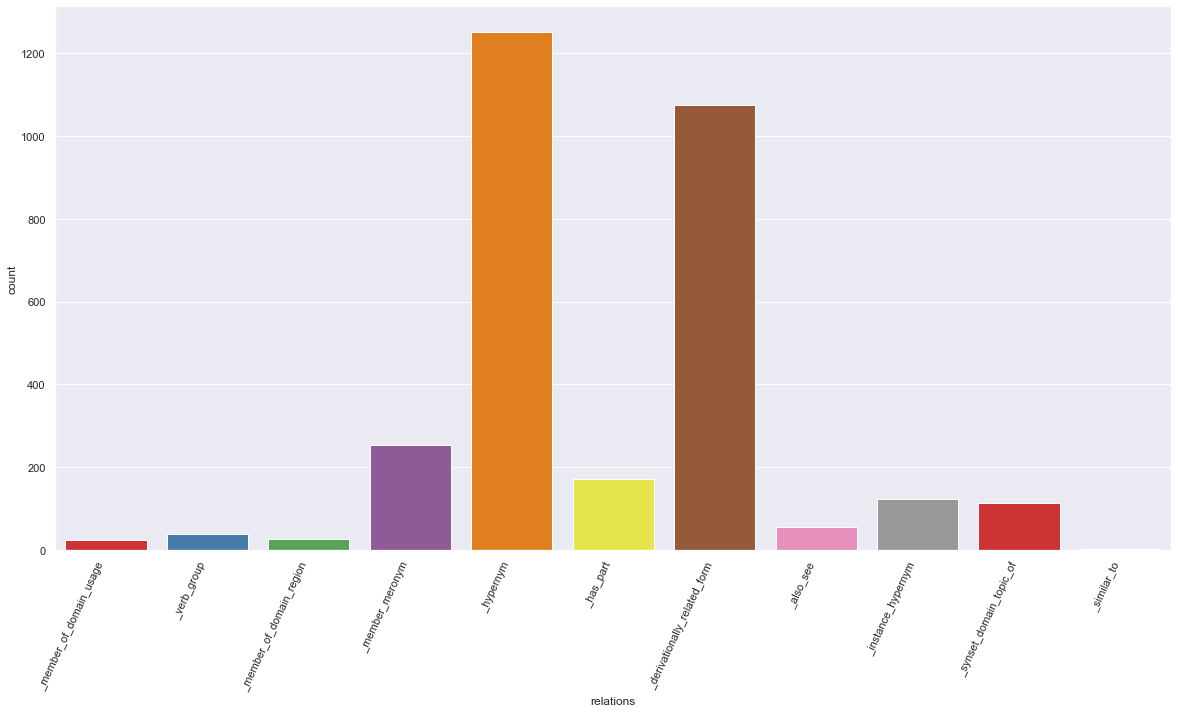

In [71]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18RR_test)
plt.xticks(rotation=65, horizontalalignment='right')

Có thể thấy mối quan hệ ở đây chủ yếu là hyponym (Thượng vị) và loại bỏ hạ vị và derivationally_related_form (hình thức liên quan)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

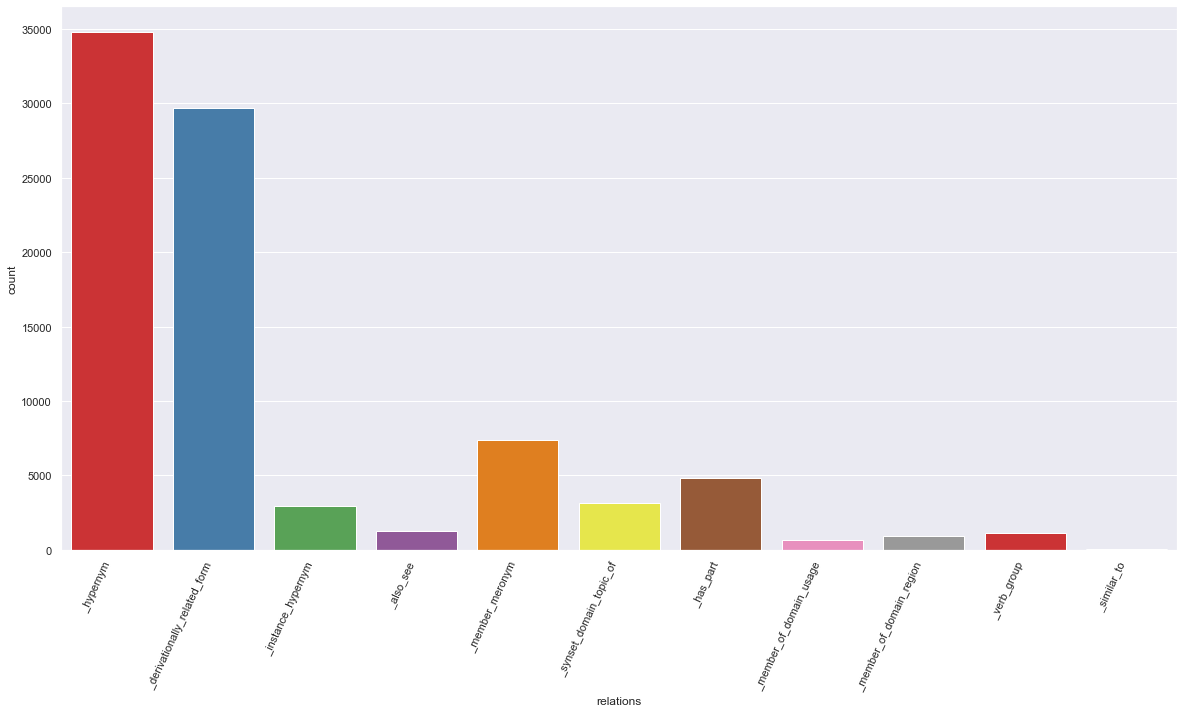

In [75]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18RR_train)
plt.xticks(rotation=65, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

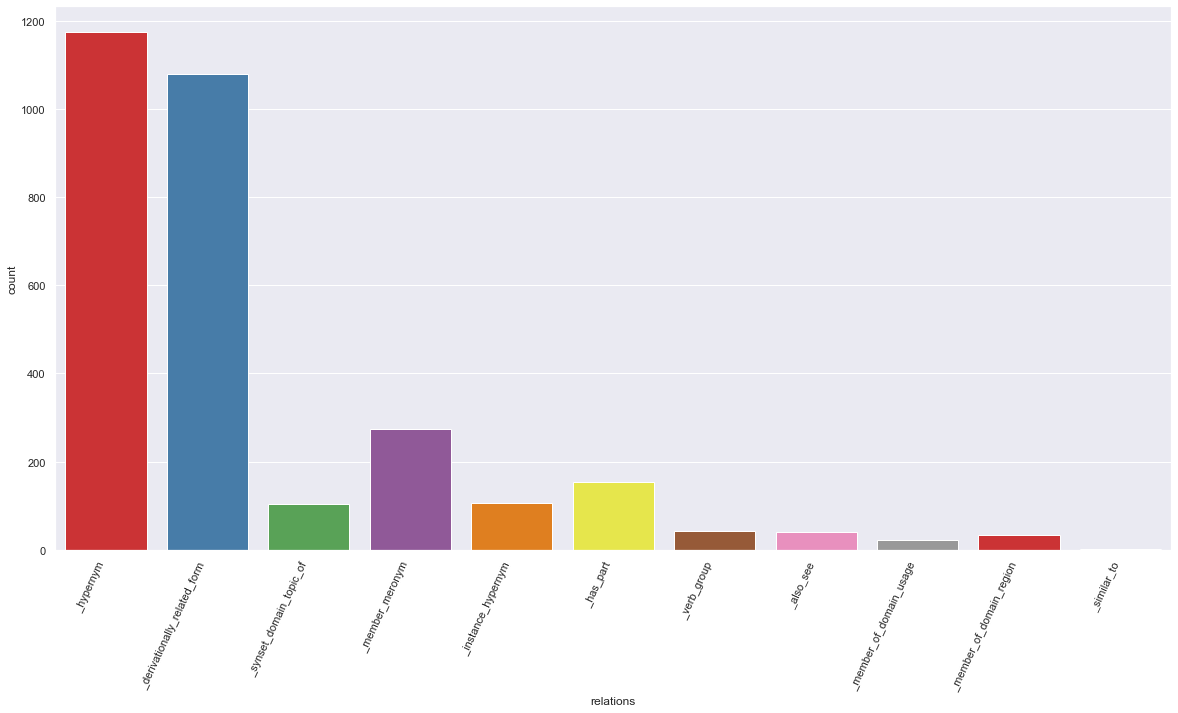

In [76]:
# Tương tự như tập train
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='relations', palette='Set1', data=WN18RR_valid)
plt.xticks(rotation=65, horizontalalignment='right')

## Nhận xét :

Tập dữ liệu WN18RR chỉ có 10 loại quan hệ. Thành phần test, train, valid tương đương với nhau



heads                     relations    tails
0       260881                     _hypernym   260622
1      1332730  _derivationally_related_form  3122748
2      6066555  _derivationally_related_form   645415
3      9322930            _instance_hypernym  9360122
4      7193596  _derivationally_related_form   784342
...        ...                           ...      ...
86830  2347865               _member_meronym  2348036
86831   856847                     _hypernym   844254
86832   800121                     _hypernym   799537
86833  5532225                     _has_part  5533948
86834   980394       _synset_domain_topic_of   759694

[86835 rows x 3 columns]